In [36]:
!pip install opencv-python

In [37]:
import cv2

In [38]:
import matplotlib.pyplot as plt
import numpy as np

In [56]:
img=cv2.imread("minion.jpg")
img.shape

(354, 630, 3)

In [57]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

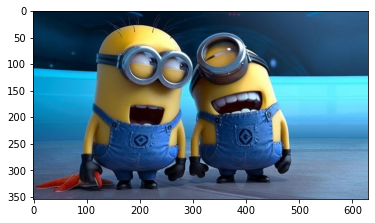

In [58]:
plt.imshow(img)
plt.show()

In [59]:
# flatten each channel of the image
all_pixels=img.reshape((-1,3))

In [60]:
all_pixels.shape

(223020, 3)

In [61]:
from sklearn.cluster import KMeans

In [62]:
dominant_colors=4
kmeans=KMeans(n_clusters=dominant_colors)
kmeans.fit(all_pixels)

KMeans(n_clusters=4)

In [63]:
kmeans.cluster_centers_

array([[ 69.30302239,  92.64529937, 114.57939657],
       [ 19.77054666,  35.58577456,  56.06244625],
       [ 84.70186076, 175.04805301, 216.32092221],
       [213.05914392, 192.67094903, 120.19566633]])

In [64]:
# convert to integers as these should be pixel values
centers=kmeans.cluster_centers_
centers=np.array(centers,dtype='uint8')

In [65]:
centers

array([[ 69,  92, 114],
       [ 19,  35,  56],
       [ 84, 175, 216],
       [213, 192, 120]], dtype=uint8)

## Plot what all these colors are

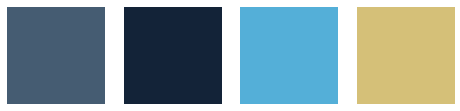

In [66]:
plt.figure(0,figsize=(8,2))

i=1

colors=[]

for col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    colors.append(col)
    #color swatch
    a=np.zeros((100,100,3),dtype='uint8')
    a[:,:,:]=col
    plt.imshow(a)
plt.show()

## Segmenting our original image

In [67]:
new_img=np.zeros(all_pixels.shape,dtype='uint8')

In [68]:
new_img.shape

(223020, 3)

In [69]:
colors

[array([ 69,  92, 114], dtype=uint8),
 array([19, 35, 56], dtype=uint8),
 array([ 84, 175, 216], dtype=uint8),
 array([213, 192, 120], dtype=uint8)]

In [70]:
kmeans.labels_

array([1, 1, 1, ..., 2, 2, 2])

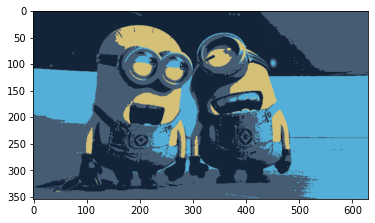

In [71]:
for i in range(new_img.shape[0]):
    new_img[i]=colors[kmeans.labels_[i]]
new_img.shape=img.shape
plt.imshow(new_img)
plt.show()